In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()
#no null values.. already cleaned dataset

User ID      0
Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64

In [4]:
#replacing 1 for Male and 0 for Female
# df["Gender"]=df["Gender"].replace(["Male","Female"],[1,0])

replace_dict={"Male":1,"Female":0}
df["Gender"].replace(replace_dict,inplace=True)

In [5]:
df


,User ID,Gender,Age,Salary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [19]:
# gender age and salary are the independent variables where as purchased is the dependent variable
#splitting the data into train ans test
x=df[["Gender","Age","Salary"]]
y=df["Purchased"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=8)


In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [22]:
reg.score(x_train,y_train)

0.8625

In [23]:
y_pred=reg.predict(x_test)

In [24]:
print(y_pred)

[0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 1]


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  6],
       [ 9, 17]], dtype=int64)

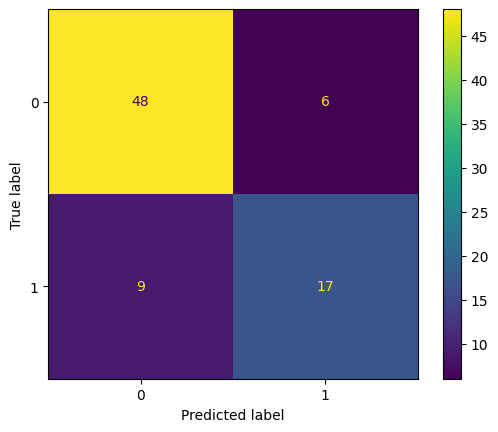

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score,precision_score,recall_score
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        75
           1       0.80      0.71      0.75        45

    accuracy                           0.82       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0.82      0.82      0.82       120



In [29]:
f1_score(y_test,y_pred)

0.693877551020408

In [31]:
accuracy_score(y_test,y_pred)

0.8125

In [36]:
precision_score(y_test,y_pred)

0.7391304347826086

In [37]:
recall_score(y_test,y_pred)

0.6538461538461539